# RGB to HSV Conversion
## Manual Conversion

In [1]:
def f_rgb_to_hsv(r,g,b, scaleFactor):
    r, g, b, = r/255.0, g/255.0, b/255.0
    cmax = max(r,g,b)       # Maximum of r,g,b
    cmin = min(r,g,b)       # Minimum of r,g,b
    diff = cmax-cmin
    if cmax == cmin:
        h = 0
    elif cmax == r:
        h = (60 * ((g-b) / diff) + 0) % 360
    elif cmax == g:
        h = (60 * ((b-r) / diff) + 120) % 360
    elif cmax == b:
        h = (60 * ((r-g) / diff) + 240) % 360
        
    if h < 0:
        h = h + 360
    if cmax == 0:
        s = 0
    else:
        s = (diff / cmax) * scaleFactor
    v = cmax * scaleFactor
    return h, s, v


In [2]:
print(f_rgb_to_hsv(100,200,50,100))

(100.0, 75.0, 78.43137254901961)


## Using OpenCV to Convert RGB to HSV

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
im = cv2.imread('/Users/angelito/Documents/python_projects/Learn/Learning_OpenCV/imgs/tulips.jpg')

In [5]:
HsvIm = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)

In [6]:
type(HsvIm)

numpy.ndarray

In [7]:
HsvIm.shape

(638, 640, 3)

### Converting HSV to RGB and BGR using OpenCV

In [8]:
im1 = cv2.cvtColor(HsvIm, cv2.COLOR_HSV2RGB)
im2 = cv2.cvtColor(HsvIm, cv2.COLOR_HSV2BGR)

In [9]:
img = cv2.imread('/Users/angelito/Documents/python_projects/Learn/Learning_OpenCV/imgs/tulips.jpg')

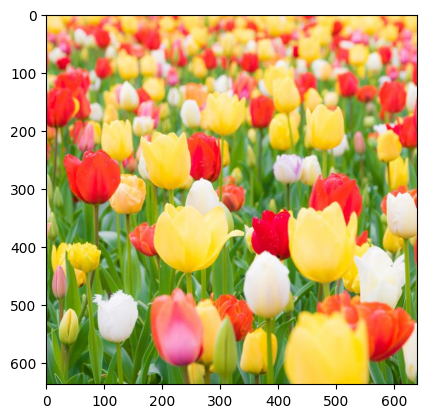

In [10]:
plt.imshow(img[:,:,::-1])

## Image Segmentation
### We want to detect all red tulips

In [11]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [12]:
lr = np.array([0,120,70])
ur = np.array([8, 255, 255])
mask1 = cv2.inRange(hsv, lr, ur)

In [13]:
type(mask1)

numpy.ndarray

In [14]:
mask1.dtype

dtype('uint8')

In [15]:
mask1.shape

(638, 640)

In [16]:
mask1.max()

255

In [17]:
mask1.min()

0

In [18]:
lr = np.array([170,120,70])
ur = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv,lr, ur)

In [19]:
np.unique(mask2)

array([  0, 255], dtype=uint8)

In [20]:
np.unique(mask1)

array([  0, 255], dtype=uint8)

In [21]:
mask = mask1 | mask2

In [22]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [23]:
res = cv2.bitwise_and(img, img, mask=mask)

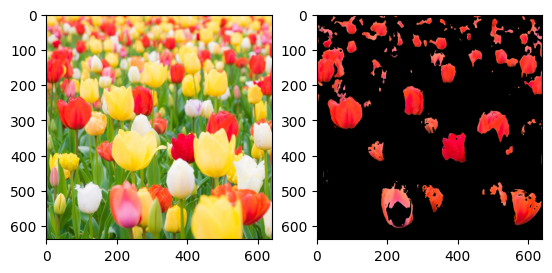

In [24]:
plt.figure(1)

plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(res[:,:,::-1])
plt.show()